Generating habitable zone plot...


<ipython-input-2-161c0dd4fbb3>:37: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(stellar_luminosity/s_eff)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

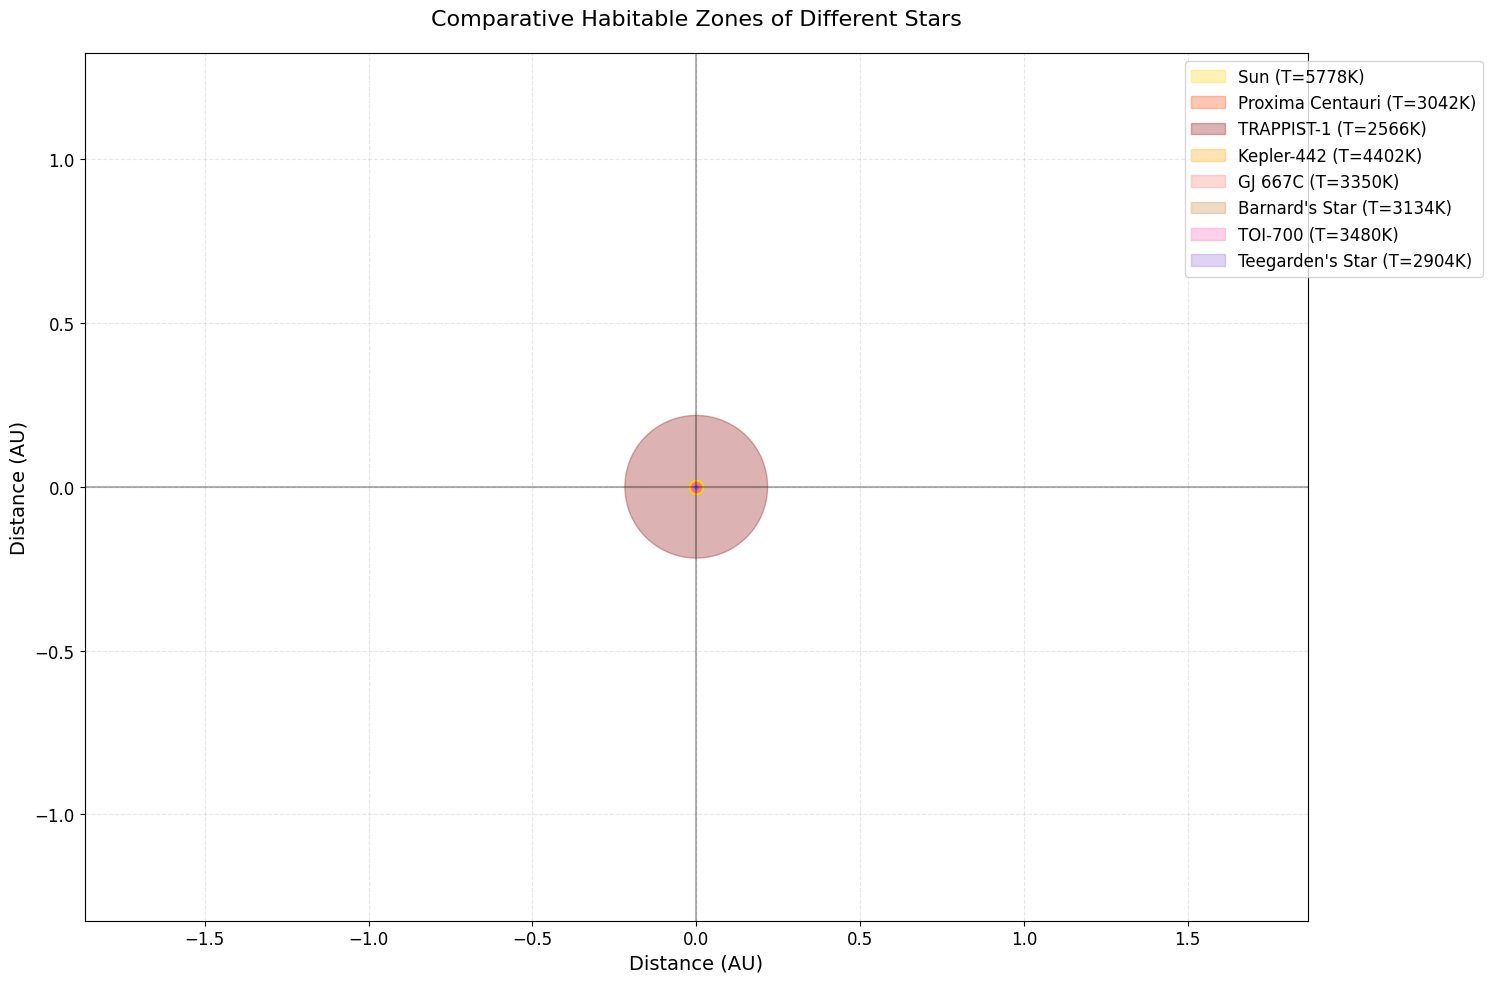


Generating habitable zone data table...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

            Star  Temperature (K)  Luminosity (L⊙)  Inner HZ (AU)  Outer HZ (AU)  HZ Width (AU)
             Sun             5778         1.000000            NaN            NaN            NaN
Proxima Centauri             3042         0.001700            NaN            NaN            NaN
      TRAPPIST-1             2566         0.000524          0.218            NaN            NaN
      Kepler-442             4402         0.083000            NaN            NaN            NaN
         GJ 667C             3350         0.013700            NaN            NaN            NaN
  Barnard's Star             3134         0.003500            NaN            NaN            NaN
         TOI-700             3480         0.023400            NaN            NaN            NaN
Teegarden's Star             2904         0.000730            NaN            NaN            NaN


In [2]:
# First cell - Run this to install required packages
!pip install numpy matplotlib astropy pandas seaborn

# Second cell - Import libraries and set style
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.constants import L_sun, R_sun, M_sun
import pandas as pd
from google.colab import files
import seaborn as sns

# Set plot style
plt.style.use('default')  # Using default style instead of seaborn
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True

class HabitableZone:
    def __init__(self):
        # Kopparapu et al. (2013) coefficients
        self.coefficients = {
            'recent_venus': {'a': 1.776e-4, 'b': 2.136e-4, 'c': 2.533e-8, 'd': -1.332e-11},
            'runaway_greenhouse': {'a': 1.107e-4, 'b': 1.332e-4, 'c': 1.58e-8, 'd': -8.308e-12},
            'moist_greenhouse': {'a': 1.014e-4, 'b': 1.219e-4, 'c': 1.452e-8, 'd': -7.63e-12},
            'maximum_greenhouse': {'a': 3.903e-4, 'b': 4.787e-4, 'c': 5.705e-8, 'd': -2.801e-11},
            'early_mars': {'a': 5.528e-4, 'b': 6.679e-4, 'c': 7.910e-8, 'd': -3.91e-11}
        }

    def calculate_hz_limits(self, stellar_luminosity, stellar_temp):
        """Calculate HZ boundaries using Kopparapu et al. (2013) equations."""
        hz_boundaries = {}
        t_star = stellar_temp - 5780  # Relative to Solar temperature

        for boundary, coef in self.coefficients.items():
            s_eff = (coef['a'] + coef['b']*t_star + coef['c']*t_star**2 + coef['d']*t_star**3)
            distance = np.sqrt(stellar_luminosity/s_eff)
            hz_boundaries[boundary] = distance

        return hz_boundaries

def get_star_properties():
    """Return dictionary of example star properties."""
    return {
        'Sun': {'temp': 5778, 'luminosity': 1.0, 'mass': 1.0},
        'Proxima Centauri': {'temp': 3042, 'luminosity': 0.0017, 'mass': 0.123},
        'TRAPPIST-1': {'temp': 2566, 'luminosity': 0.000524, 'mass': 0.089},
        'Kepler-442': {'temp': 4402, 'luminosity': 0.0830, 'mass': 0.61},
        'GJ 667C': {'temp': 3350, 'luminosity': 0.0137, 'mass': 0.33},
        'Barnard\'s Star': {'temp': 3134, 'luminosity': 0.0035, 'mass': 0.144},
        'TOI-700': {'temp': 3480, 'luminosity': 0.0234, 'mass': 0.416},
        'Teegarden\'s Star': {'temp': 2904, 'luminosity': 0.00073, 'mass': 0.089}
    }

def plot_habitable_zones(save_plot=True):
    """Plot habitable zones with option to save the plot."""
    # Initialize the HZ calculator
    hz_calculator = HabitableZone()
    stars = get_star_properties()

    # Create figure
    plt.figure(figsize=(15, 10))

    # Colors for different stars
    colors = {
        'Sun': '#FFD700',
        'Proxima Centauri': '#FF4500',
        'TRAPPIST-1': '#8B0000',
        'Kepler-442': '#FFA500',
        'GJ 667C': '#FA8072',
        'Barnard\'s Star': '#CD853F',
        'TOI-700': '#FF69B4',
        'Teegarden\'s Star': '#9370DB'
    }

    # Plot each star's habitable zone
    for star_name, properties in stars.items():
        # Calculate HZ boundaries
        hz_bounds = hz_calculator.calculate_hz_limits(properties['luminosity'],
                                                    properties['temp'])

        # Plot conservative HZ (between runaway and maximum greenhouse)
        inner = hz_bounds['runaway_greenhouse']
        outer = hz_bounds['maximum_greenhouse']

        # Create filled region for HZ
        theta = np.linspace(0, 2*np.pi, 100)
        x_inner = inner * np.cos(theta)
        y_inner = inner * np.sin(theta)
        x_outer = outer * np.cos(theta)
        y_outer = outer * np.sin(theta)

        plt.fill(np.append(x_outer, x_inner[::-1]),
                np.append(y_outer, y_inner[::-1]),
                alpha=0.3, color=colors[star_name],
                label=f'{star_name} (T={properties["temp"]}K)')

        # Plot star
        plt.plot(0, 0, 'o', color=colors[star_name],
                markersize=10*np.sqrt(properties['mass']))

    # Plot settings
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.axis('equal')
    plt.title('Comparative Habitable Zones of Different Stars', size=16, pad=20)
    plt.xlabel('Distance (AU)', size=14)
    plt.ylabel('Distance (AU)', size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

    # Add scale
    plt.axhline(y=0, color='k', alpha=0.3)
    plt.axvline(x=0, color='k', alpha=0.3)

    # Set limits
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

    # Adjust layout
    plt.tight_layout()

    # Save plot if requested
    if save_plot:
        plt.savefig('habitable_zones.png', dpi=300, bbox_inches='tight')
        files.download('habitable_zones.png')

    plt.show()

def create_hz_table(save_csv=True):
    """Create and optionally save a table of HZ boundaries for each star."""
    hz_calculator = HabitableZone()
    stars = get_star_properties()

    data = []
    for star_name, properties in stars.items():
        hz_bounds = hz_calculator.calculate_hz_limits(properties['luminosity'],
                                                    properties['temp'])
        data.append({
            'Star': star_name,
            'Temperature (K)': properties['temp'],
            'Luminosity (L⊙)': properties['luminosity'],
            'Inner HZ (AU)': round(hz_bounds['runaway_greenhouse'], 3),
            'Outer HZ (AU)': round(hz_bounds['maximum_greenhouse'], 3),
            'HZ Width (AU)': round(hz_bounds['maximum_greenhouse'] -
                                 hz_bounds['runaway_greenhouse'], 3)
        })

    df = pd.DataFrame(data)

    if save_csv:
        df.to_csv('habitable_zones_data.csv', index=False)
        files.download('habitable_zones_data.csv')

    return df

# Third cell - Run the visualization and analysis
print("Generating habitable zone plot...")
plot_habitable_zones()

print("\nGenerating habitable zone data table...")
hz_table = create_hz_table()
print(hz_table.to_string(index=False))

# Fourth cell (optional) - Custom star analysis function
def analyze_custom_star(temp, luminosity, mass, name="Custom Star"):
    """Analyze a custom star's habitable zone."""
    hz_calculator = HabitableZone()
    hz_bounds = hz_calculator.calculate_hz_limits(luminosity, temp)

    print(f"\nHabitable Zone Analysis for {name}:")
    print(f"Temperature: {temp} K")
    print(f"Luminosity: {luminosity} L⊙")
    print(f"Mass: {mass} M⊙")
    print("\nHabitable Zone Boundaries:")
    print(f"Inner Boundary: {hz_bounds['runaway_greenhouse']:.3f} AU")
    print(f"Outer Boundary: {hz_bounds['maximum_greenhouse']:.3f} AU")
    print(f"Zone Width: {(hz_bounds['maximum_greenhouse'] - hz_bounds['runaway_greenhouse']):.3f} AU")

    return hz_bounds

# Example usage:
# analyze_custom_star(temp=3500, luminosity=0.02, mass=0.4, name="My Star")